In [1]:
import pandas as pd
import openpyxl
import numpy as np

In [2]:
df_combined = pd.read_excel("../additional_materials/Lego Database.xlsx", sheet_name=None)

In [3]:
# Load the Excel file
excel_file = pd.ExcelFile("../additional_materials/Lego Database.xlsx")

# See what sheets it contains
print(excel_file.sheet_names)

['group1', 'group 2', 'group_3', 'group 4', 'group_5', 'Sheet5']


In [4]:
# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(excel_file, sheet_name=None)

# Combine them all
df_combined = pd.concat(all_sheets.values(), ignore_index=True)

print(df_combined.head())
print(f"Total rows: {len(df_combined)}")

    id      color is duplo? size type base shape base dimensions  \
0  NaN  Dark Blue      True     Brick  Rectangle           2 x 4   
1  NaN      Green      True     Brick  Rectangle           2 x 4   
2  NaN      Coral      True     Brick     Square           2 x 2   
3  NaN        Red      True     Brick     Square           2 x 2   
4  NaN      White      True     Brick     Square           2 x 2   

   number of studs has slope?  slope degree in stock  transparent  
0              8.0      False           NaN        1          NaN  
1              8.0      False           NaN        1          NaN  
2              4.0      False           NaN        1          NaN  
3              4.0      False           NaN        1          NaN  
4              4.0      False           NaN        1          NaN  
Total rows: 204


In [47]:
df_cleaned.shape

(204, 12)

In [ ]:
# Create new DataFrame to store clean data
df_cleaned = df_combined


In [57]:
# Get shape
df_cleaned.shape

(204, 13)

In [58]:
# Fill the id column with index
df_cleaned['id'] = range(1, len(df_cleaned) + 1)

In [6]:
# Color column cleaning
df_cleaned["color"].unique()

array(['Dark Blue', 'Green', 'Coral', 'Red', 'White', 'Light Green',
       'Orange', 'Yellow', 'Brown', 'Purple', 'Lilac', 'Orchid',
       'Dark Grey', 'Light Grey', 'Pink', 'Dark Green', 'Cream', 'Black',
       'Red Brown', 'Neon Yellow', 'Cyan', 'Denim Blue', 'Ice Blue',
       'Capri', 'Shiny Green', 'Olive Green', 'Beige', 'Bright Pink',
       'Transparent', 'lightgreen', 'lightbrown', 'lightpink', 'red',
       'yellow', 'darkblue', 'darkgreen', 'darkpink', 'orange',
       'darkpurple', 'lightpurple', 'white', 'grey', 'mudbrown', 'black',
       'turquoise', 'lightblue', 'neon orange', 'neon dark yellow',
       'neon light yellow', 'darkbrown', 'bright green', 'pink', 'peach',
       'blue', 'pear', 'dark green ', 'dark green', 'sky blue',
       'bright yellow', 'navy blue', 'purple', 'maroon', 'cream', 'khaki',
       'neon green', 'neon yellow', 'neon blue', 'coral', 'lime green',
       'green', 'brick red', 'cyan', 'baby blue', 'cafe', 'hot magent',
       'Green ', 'Bl

In [7]:
# Remove spaces and convert to lowercase
df_cleaned["color"] = df_cleaned["color"].str.lower().str.replace(" ", "")
df_cleaned["color"].unique()

array(['darkblue', 'green', 'coral', 'red', 'white', 'lightgreen',
       'orange', 'yellow', 'brown', 'purple', 'lilac', 'orchid',
       'darkgrey', 'lightgrey', 'pink', 'darkgreen', 'cream', 'black',
       'redbrown', 'neonyellow', 'cyan', 'denimblue', 'iceblue', 'capri',
       'shinygreen', 'olivegreen', 'beige', 'brightpink', 'transparent',
       'lightbrown', 'lightpink', 'darkpink', 'darkpurple', 'lightpurple',
       'grey', 'mudbrown', 'turquoise', 'lightblue', 'neonorange',
       'neondarkyellow', 'neonlightyellow', 'darkbrown', 'brightgreen',
       'peach', 'blue', 'pear', 'skyblue', 'brightyellow', 'navyblue',
       'maroon', 'khaki', 'neongreen', 'neonblue', 'limegreen',
       'brickred', 'babyblue', 'cafe', 'hotmagent', 'deepblue',
       'transparentyellow', 'transparentorange', 'blck',
       'transparentskyblue'], dtype=object)

In [8]:
# Create a new column that contains the base color
# Original mapping
color_map = {
    'blue': ['darkblue', 'denimblue', 'iceblue', 'capri', 'lightblue', 'blue', 'skyblue', 'navyblue', 'deepblue', 'babyblue', 'neonblue', 'transparentskyblue', 'cyan', 'turquoise'],
    'green': ['green', 'lightgreen', 'darkgreen', 'shinygreen', 'olivegreen', 'brightgreen', 'limegreen', 'neongreen', 'pear'],
    'red': ['red', 'coral', 'redbrown', 'brickred', 'maroon' ],
    'yellow': ['yellow', 'neonyellow', 'neonlightyellow', 'brightyellow', 'transparentyellow', 'neondarkyellow'],
    'orange': ['orange', 'peach', 'neonorange', 'transparentorange'],
    'brown': ['brown', 'lightbrown', 'darkbrown', 'mudbrown', 'cafe', 'khaki', 'beige', 'cream'],
    'pink': ['pink', 'lightpink', 'darkpink', 'brightpink', 'orchid', 'lilac', 'hotmagent'],
    'purple': ['purple', 'darkpurple', 'lightpurple'],
    'grey': ['darkgrey', 'lightgrey', 'grey'],
    'white': ['white'],
    'black': ['black', 'blck'],
    'transparent': ['transparent']
}

# Reverse mapping: detailed color → general color
flat_color_map = {detailed: general for general, lst in color_map.items() for detailed in lst}

# Now map works
df_cleaned["color base shade"] = df_cleaned["color"].map(flat_color_map)
df_cleaned["color base shade"].unique()

# Reset the index and drop the old one
df_cleaned = df_cleaned.reset_index(drop=True)

# Get the list of columns
cols = df_cleaned.columns.tolist()

# Remove 'color_base_shade' from its current position
cols.remove('color base shade')

# Find the index of 'color' column
color_index = cols.index('color')

# Insert 'color_base_shade' right after 'color'
cols.insert(color_index + 1, 'color base shade')

# Reorder the dataframe
df_cleaned = df_cleaned[cols]


In [9]:
# Is Duplo? column cleaning
# Print unique values
df_cleaned["is duplo?"].unique()


array([True, False, 'yes', 'no'], dtype=object)

In [10]:
# Standardize strings
df_cleaned["is duplo?"] = df_cleaned["is duplo?"].astype(str).str.lower()

# Standardize values
df_cleaned["is duplo?"] = df_cleaned["is duplo?"].map({
    "yes": 1,
    "true": 1,
    "1": 1,
    "no": 0,
    "false": 0,
    "0": 0
})

# Check cleaned unique values
print(df_cleaned["is duplo?"].unique())

[1 0]


In [11]:
# Size type column cleaning
# Print unique values
df_cleaned["size type"].unique()

array(['Brick', 'Plate', 'plate', 'brick', 'tile'], dtype=object)

In [12]:
# Standardize strings
df_cleaned["size type"] = df_cleaned["size type"].astype(str).str.lower()

# Standardize values
df_cleaned["size type"] = df_cleaned["size type"].map({
    "tile": "plate",
    "plate": "plate",
    "brick": "brick",
})
# Check cleaned unique values
print(df_cleaned["size type"].unique())

['brick' 'plate']


In [13]:
# Base shape column cleaning
# Print unique values
df_cleaned["base shape"].unique()
# Standardize strings
df_cleaned["base shape"] = df_cleaned["base shape"].astype(str).str.lower()
# Print unique values again
df_cleaned["base shape"].unique()



array(['rectangle', 'square', 'circle', 'trapezium', 'triangle',
       'trapezoid', 'round', 'wadge'], dtype=object)

In [14]:
# Standardize strings
df_cleaned["base shape"] = df_cleaned["base shape"].astype(str).str.lower()
# Print unique values again
df_cleaned["base shape"].unique()

# Standardize values
df_cleaned["base shape"] = df_cleaned["base shape"].map({
    "rectangle": "rectangle",
    "square": "square",
    "circle": "circle",
    "round": "circle",
    "triangle": "triangle",
    "wadge": "triangle",
    "trapezoid": "trapezoid",
    "trapezium": "trapezoid",
})

df_cleaned["base shape"].unique()

array(['rectangle', 'square', 'circle', 'trapezoid', 'triangle'],
      dtype=object)

In [15]:
# Base dimensions column cleaning
# Print unique values
df_cleaned["base dimensions"].unique()\
# Standardize strings
df_cleaned["base dimensions"] = df_cleaned["base dimensions"].astype(str).str.lower().str.replace(" ", "")
# Print unique values again
df_cleaned["base dimensions"].unique()

array(['2x4', '2x2', '2x8', '1x4', '1x3', '2x6', '1x2', '4x6', '1x1',
       '2x3', '0x0', '2x4+2x2', '2*4', '2*8', '2*2', '2*6', '2*3', '1*3',
       '1*4', '1*2', '1*1', '4*6', '4x2', '8x2', '6x2', '4x1', '2x1',
       '3x2', '6x4', '4x4', '3x1', '4*4'], dtype=object)

In [16]:
# Replace * with x for consistency
df_cleaned["base dimensions"] = df_cleaned["base dimensions"].str.replace("*", "x", regex=False)

# Check the unique values
print(df_cleaned["base dimensions"].unique())


['2x4' '2x2' '2x8' '1x4' '1x3' '2x6' '1x2' '4x6' '1x1' '2x3' '0x0'
 '2x4+2x2' '4x2' '8x2' '6x2' '4x1' '2x1' '3x2' '6x4' '4x4' '3x1']


In [17]:
# Normalize base dimensions so that order doesn't matter *Code Generated by AI*
df_cleaned["base dimensions"] = df_cleaned["base dimensions"].apply(
    lambda dim: np.nan if pd.isna(dim) or str(dim).strip() == "" or str(dim).replace(" ", "").lower() == "2x2+2x4"
    else "+".join(sorted(["x".join(sorted(b.lower().replace(" ", "").replace("*", "x").split("x"))) for b in str(dim).split("+")]))
)

# Check unique values
print(df_cleaned["base dimensions"].unique())


['2x4' '2x2' '2x8' '1x4' '1x3' '2x6' '1x2' '4x6' '1x1' '2x3' '0x0'
 '2x2+2x4' '4x4']


In [18]:
# Number of studs column cleaning
# Get type
print(df_cleaned["number of studs"].dtype)

float64


In [19]:
df_cleaned["has slope?"] = df_cleaned["has slope?"].replace({
    "yes": 1,
    "true": 1,
    "1": 1,
    "no": 0,
    "false": 0,
    "0": 0})

In [20]:
df_cleaned["has slope?"].value_counts()

has slope?
False    180
True      24
Name: count, dtype: int64

In [21]:
# Slope degree column cleaning
# Get type
print(df_cleaned["slope degree"].dtype)
df_cleaned["slope degree"].unique()

float64


array([nan, 45.,  0., 15., 30.])

In [22]:
# Fill missing values with 0.0
df_cleaned["slope degree"] = df_cleaned["slope degree"].fillna(0.0)

# Check that there are no missing values left
print(df_cleaned["slope degree"].isna().sum())

0


In [23]:
# In stock column cleaning
# Get unique values
df_cleaned["in stock"].unique()
df_cleaned["in stock"] = df_cleaned["in stock"].replace({
    "yes": 1,
})


/var/folders/64/4f9k2wyx0r14830_8g7xntcw0000gn/T/ipykernel_43594/3348433945.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned["in stock"] = df_cleaned["in stock"].replace({


In [24]:
# Transparent column cleaning
# Get type
print(df_cleaned["transparent"].dtype)

# Fill missing values and convert to integer
df_cleaned["transparent"] = pd.to_numeric(df_cleaned["transparent"], errors="coerce").fillna(0).astype(int)



float64


In [25]:
dataset = df_cleaned.copy()

In [26]:
import seaborn as sns 

<Axes: title={'center': 'Count of Plate vs Brick'}, xlabel='size type', ylabel='count'>

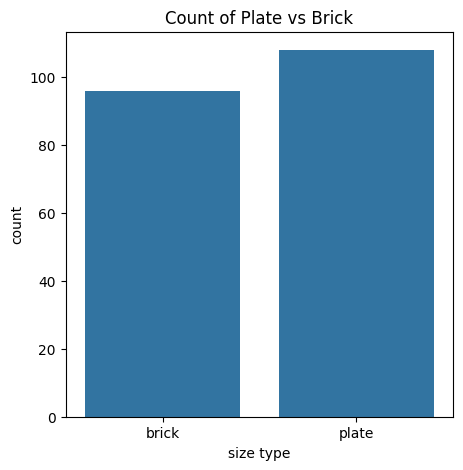

In [46]:
plt.figure(figsize=(5,5))
plt.title("Count of Plate vs Brick")
sns.countplot(x = dataset["size type"])

In [30]:
import matplotlib.pyplot as plt

<Axes: title={'center': "Number of duplo's with respect to each base shape"}, xlabel='base shape', ylabel='count'>

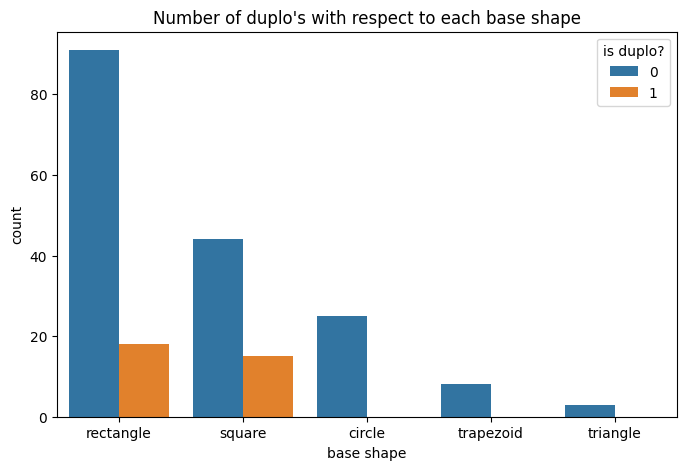

In [31]:
plt.figure(figsize=(8,5))
plt.title("Number of duplo's with respect to each base shape")
sns.countplot(x = dataset["base shape"], hue = dataset["is duplo?"])

<Axes: title={'center': 'Number of pieces having slope with respect to each base shape'}, xlabel='base shape', ylabel='count'>

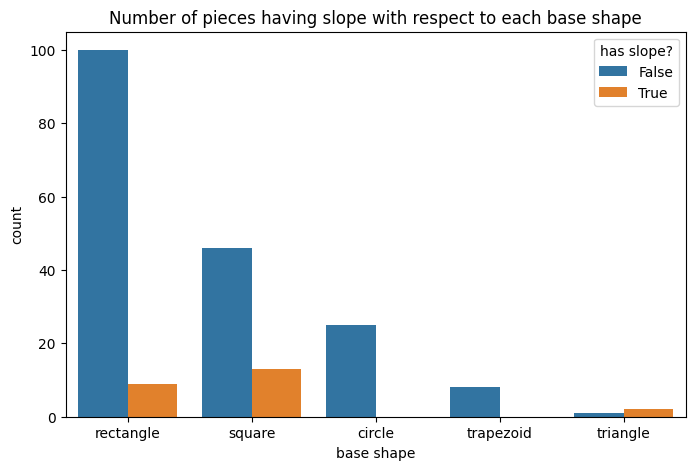

In [32]:
plt.figure(figsize=(8,5))
plt.title("Number of pieces having slope with respect to each base shape")
sns.countplot(x = dataset["base shape"], hue = dataset["has slope?"])

<Axes: title={'center': 'Percentage of pieces which are duplo'}, ylabel='count'>

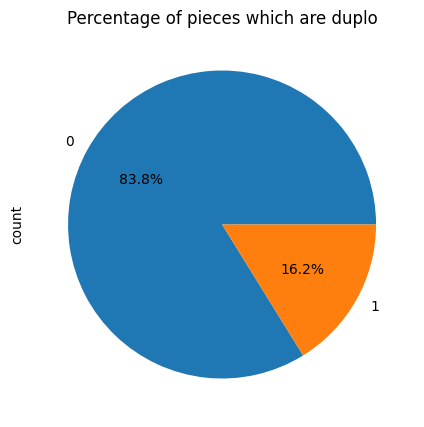

In [33]:
plt.figure(figsize=(8,5))
plt.title("Percentage of pieces which are duplo")
dataset['is duplo?'].value_counts().plot.pie(autopct='%1.1f%%')


<Axes: title={'center': 'Number of studs against their frequency'}, xlabel='number of studs', ylabel='Count'>

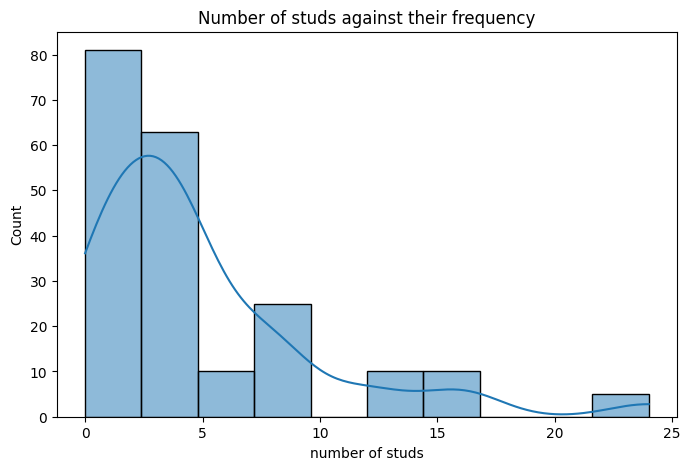

In [34]:
plt.figure(figsize=(8,5))
plt.title("Number of studs against their frequency")
sns.histplot(dataset['number of studs'], bins=10,kde = True)


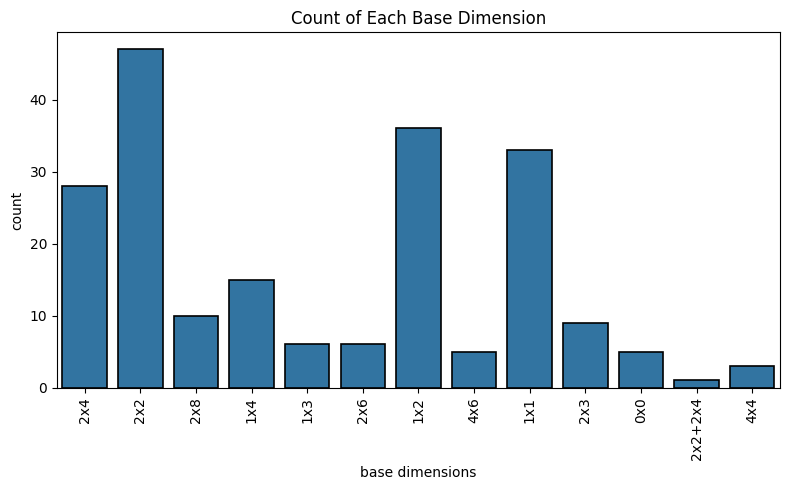

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x="base dimensions", data=dataset, edgecolor="black", linewidth=1.2)

plt.title("Count of Each Base Dimension")
plt.xticks(rotation=90)   # rotate axis labels
plt.tight_layout()
plt.show()


<Axes: xlabel='base shape', ylabel='number of studs'>

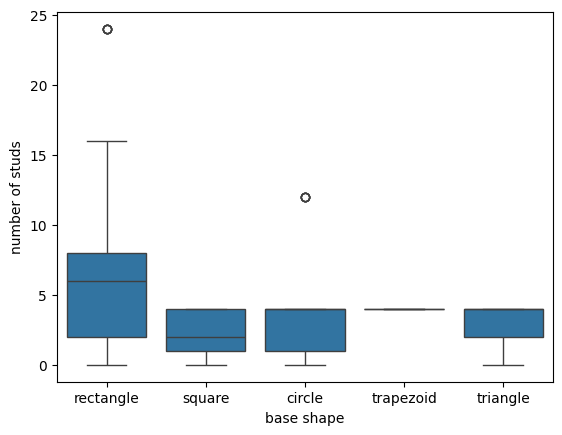

In [36]:
sns.boxplot(x='base shape', y='number of studs', data=dataset)


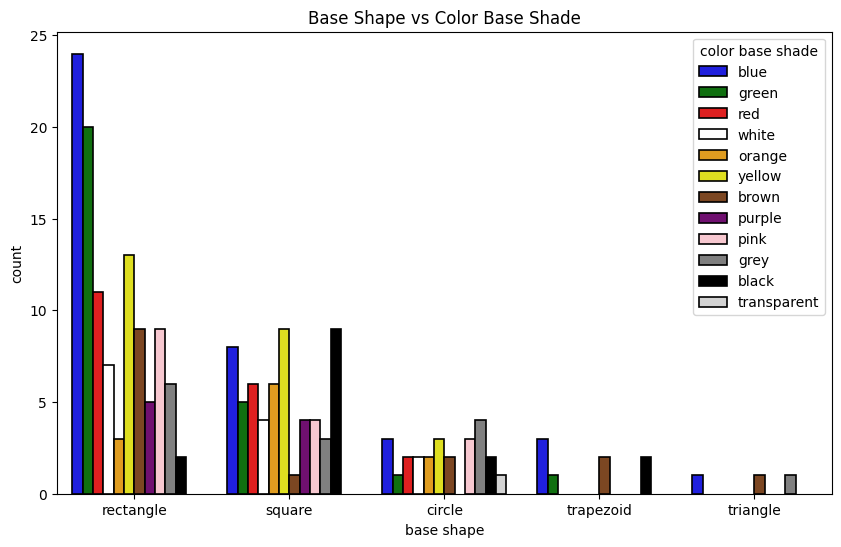

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your color mapping (add more as needed)
color_map = {
    'blue': 'blue',
    'green': 'green',
    'red': 'red',
    'white': 'white',
    'orange': 'orange',
    'yellow': 'yellow',
    'brown': 'saddlebrown',
    'purple': 'purple',
    'pink': 'pink',
    'grey': 'grey',
    'black': 'black',
    'transparent': 'lightgrey'  # or 'none'
}

plt.figure(figsize=(10,6))
plt.title("Base Shape vs Color Base Shade")
sns.countplot(
    x="base shape",
    hue="color base shade",
    data=dataset,
    palette=color_map,
    edgecolor="black",      # border color
    linewidth=1.2  
)

plt.show()


In [40]:
dataset.to_csv("cleaned_lego.csv")